In [1]:
from src.data import DataLoaders
from src import utils
import pathlib
import pandas as pd
from src.models.ModelClasses import FireRiskModels, SmokeAlarmModels
from matplotlib import pyplot as plt
from pathlib import Path
import geopandas as geo
import folium

from datetime import date

import numpy as np

import fiona

import pyproj

C:\Users\cle9a\anaconda3\envs\rcp2Lite3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
out = pd.read_csv(r'.\Data\Model Outputs\CombinedModels-2022-04-04.csv')
out['GEOID'] = out['GEOID'].str[2:]
out

,GEOID,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,...,detectors_working_CI,geography,"Population Density (per square mile), 2010",detectors_predicted,smoke_detector_risk_frac,smoke_detector_risk_score,SVI_Theme_1,fire_propensity_risk_score,fire_severity_risk_score,CombinedRiskScore
0,010010201001,1.342282,2.684564,NaN,NaN,NaN,NaN,NaN,1.342282,1.342282,...,1.089020,state,504.8,87.691010,0.123090,0.061519,0.3913,0.109424,0.493663,0.263976
1,010010201002,1.581028,0.790514,NaN,1.581028,0.790514,NaN,1.581028,0.790514,NaN,...,1.089020,state,504.8,86.379715,0.136203,0.079288,0.3913,0.065521,0.015588,0.137924
2,010010202001,1.047120,NaN,3.141361,NaN,1.047120,1.047120,1.047120,1.047120,NaN,...,1.089020,state,1682.5,67.203520,0.327965,0.609790,0.7065,0.258691,0.764298,0.584820
3,010010202002,2.832861,2.832861,2.832861,0.944287,0.944287,NaN,0.944287,NaN,3.777148,...,1.089020,state,1682.5,67.342606,0.326574,0.605744,0.7065,0.184831,0.197458,0.423633
4,010010203001,0.846024,1.269036,0.846024,0.423012,1.269036,0.423012,0.423012,0.846024,NaN,...,1.089020,state,1633.1,65.656820,0.343432,0.654320,0.5659,0.002488,0.003415,0.306531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217734,560459511001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372684,NaN,...,3.199404,state,1.4,71.191925,0.288081,0.484608,0.3925,0.608018,0.579069,0.516049
217735,560459511002,0.632111,NaN,NaN,NaN,NaN,NaN,0.632111,NaN,NaN,...,3.199404,state,1.4,70.532160,0.294678,0.505840,0.3925,0.169665,0.444465,0.378117
217736,560459513001,0.868810,NaN,0.868810,NaN,0.868810,0.868810,NaN,NaN,1.737619,...,3.199404,state,91.0,77.607216,0.223928,0.284853,0.5093,0.082466,0.692106,0.392181
217737,560459513002,NaN,NaN,0.970874,NaN,NaN,0.970874,NaN,NaN,NaN,...,3.199404,state,91.0,78.863075,0.211369,0.247585,0.5093,0.347528,0.260543,0.341239


In [3]:
ACS =  DataLoaders.ACSData(2016,'block_group')
ACS_data = ACS.data

ACS_cols_to_use =[ 'did_not_work_past_12_mo',
               'house_pct_live_alone',
               'pct_alt_heat',
               'house_yr_pct_before_1960',
               'inc_pct_poverty',
               'race_pct_black_or_amind']

ACS_data = ACS_data[ACS_cols_to_use]

C:\Users\cle9a\Documents\rcp2_2_18_2022\src\data\DataLoaders.py:72: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ACS.drop('geoid','columns',inplace =True)
C:\Users\cle9a\Documents\rcp2_2_18_2022\src\data\DataLoaders.py:83: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ACS.drop('inc_pcincome','columns',inplace= True)
C:\Users\cle9a\Documents\rcp2_2_18_2022\src\data\DataLoaders.py:92: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ACS.drop(col,'columns', inplace = True)
C:\Users\cle9a\Documents\rcp2_2_18_2022\src\data\DataLoaders.py:92: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ACS.drop(col,'columns', inplace = True)
C:\Users\cle9a\Docume

In [4]:
out = out.merge(ACS_data, how = 'left', right_index = True, left_on = 'GEOID')
out

,GEOID,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,...,SVI_Theme_1,fire_propensity_risk_score,fire_severity_risk_score,CombinedRiskScore,did_not_work_past_12_mo,house_pct_live_alone,pct_alt_heat,house_yr_pct_before_1960,inc_pct_poverty,race_pct_black_or_amind
0,010010201001,1.342282,2.684564,NaN,NaN,NaN,NaN,NaN,1.342282,1.342282,...,0.3913,0.109424,0.493663,0.263976,0.355019,0.221831,0.017606,0.221831,0.191946,0.214765
1,010010201002,1.581028,0.790514,NaN,1.581028,0.790514,NaN,1.581028,0.790514,NaN,...,0.3913,0.065521,0.015588,0.137924,0.309021,0.127193,0.032895,0.079229,0.044269,0.082213
2,010010202001,1.047120,NaN,3.141361,NaN,1.047120,1.047120,1.047120,1.047120,NaN,...,0.7065,0.258691,0.764298,0.584820,0.509589,0.344560,0.000000,0.135678,0.382199,0.591667
3,010010202002,2.832861,2.832861,2.832861,0.944287,0.944287,NaN,0.944287,NaN,3.777148,...,0.7065,0.184831,0.197458,0.423633,0.309886,0.338496,0.019912,0.235772,0.111426,0.461974
4,010010203001,0.846024,1.269036,0.846024,0.423012,1.269036,0.423012,0.423012,0.846024,NaN,...,0.5659,0.002488,0.003415,0.306531,0.294054,0.276699,0.000000,0.030303,0.042301,0.227157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217734,560459511001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372684,NaN,...,0.3925,0.608018,0.579069,0.516049,0.301663,0.324047,0.366569,0.308305,0.094029,0.000000
217735,560459511002,0.632111,NaN,NaN,NaN,NaN,NaN,0.632111,NaN,NaN,...,0.3925,0.169665,0.444465,0.378117,0.288010,0.258713,0.825737,0.197500,0.062579,0.014547
217736,560459513001,0.868810,NaN,0.868810,NaN,0.868810,0.868810,NaN,NaN,1.737619,...,0.5093,0.082466,0.692106,0.392181,0.232123,0.330784,0.105163,0.556757,0.261512,0.000000
217737,560459513002,NaN,NaN,0.970874,NaN,NaN,0.970874,NaN,NaN,NaN,...,0.5093,0.347528,0.260543,0.341239,0.456522,0.457810,0.244165,0.595122,0.098058,0.000000


In [5]:
out.columns

Index(['GEOID', 'fires_per_1K_pop_2009', 'fires_per_1K_pop_2010',
       'fires_per_1K_pop_2011', 'fires_per_1K_pop_2012',
       'fires_per_1K_pop_2013', 'fires_per_1K_pop_2014',
       'fires_per_1K_pop_2015', 'fires_per_1K_pop_2016',
       'fires_per_1K_pop_2017', 'recorded_home_visits',
       'detectors_working_prc', 'detectors_working_CI', 'geography',
       'Population Density (per square mile), 2010', 'detectors_predicted',
       'smoke_detector_risk_frac', 'smoke_detector_risk_score', 'SVI_Theme_1',
       'fire_propensity_risk_score', 'fire_severity_risk_score',
       'CombinedRiskScore', 'did_not_work_past_12_mo', 'house_pct_live_alone',
       'pct_alt_heat', 'house_yr_pct_before_1960', 'inc_pct_poverty',
       'race_pct_black_or_amind'],
      dtype='object')

In [6]:
SVI =  DataLoaders.SVIData(ACS_data)
SVI.data


C:\Users\cle9a\Documents\rcp2_2_18_2022\src\data\DataLoaders.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACS['Tract'] = ACS.index.str[:-1]
C:\Users\cle9a\Documents\rcp2_2_18_2022\src\data\DataLoaders.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACS['geos'] = ACS.index


,inc_pct_poverty,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4
geos,,,,,
010010201001,0.191946,0.3913,0.5597,0.3735,0.0993
010010201002,0.044269,0.3913,0.5597,0.3735,0.0993
010010202001,0.382199,0.7065,0.3585,0.5821,0.7299
010010202002,0.111426,0.7065,0.3585,0.5821,0.7299
010010203001,0.042301,0.5659,0.8729,0.6429,0.3882
...,...,...,...,...,...
560459511001,0.094029,0.3925,0.6370,0.2331,0.8555
560459511002,0.062579,0.3925,0.6370,0.2331,0.8555
560459513001,0.261512,0.5093,0.6043,0.2862,0.6949


In [7]:
out = out.merge(SVI.data, how = 'left', left_on = 'GEOID', right_index = True, suffixes = ('', 'svi'))
out

,GEOID,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,...,house_pct_live_alone,pct_alt_heat,house_yr_pct_before_1960,inc_pct_poverty,race_pct_black_or_amind,inc_pct_povertysvi,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4
0,010010201001,1.342282,2.684564,NaN,NaN,NaN,NaN,NaN,1.342282,1.342282,...,0.221831,0.017606,0.221831,0.191946,0.214765,0.191946,0.3913,0.5597,0.3735,0.0993
1,010010201002,1.581028,0.790514,NaN,1.581028,0.790514,NaN,1.581028,0.790514,NaN,...,0.127193,0.032895,0.079229,0.044269,0.082213,0.044269,0.3913,0.5597,0.3735,0.0993
2,010010202001,1.047120,NaN,3.141361,NaN,1.047120,1.047120,1.047120,1.047120,NaN,...,0.344560,0.000000,0.135678,0.382199,0.591667,0.382199,0.7065,0.3585,0.5821,0.7299
3,010010202002,2.832861,2.832861,2.832861,0.944287,0.944287,NaN,0.944287,NaN,3.777148,...,0.338496,0.019912,0.235772,0.111426,0.461974,0.111426,0.7065,0.3585,0.5821,0.7299
4,010010203001,0.846024,1.269036,0.846024,0.423012,1.269036,0.423012,0.423012,0.846024,NaN,...,0.276699,0.000000,0.030303,0.042301,0.227157,0.042301,0.5659,0.8729,0.6429,0.3882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217734,560459511001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372684,NaN,...,0.324047,0.366569,0.308305,0.094029,0.000000,0.094029,0.3925,0.6370,0.2331,0.8555
217735,560459511002,0.632111,NaN,NaN,NaN,NaN,NaN,0.632111,NaN,NaN,...,0.258713,0.825737,0.197500,0.062579,0.014547,0.062579,0.3925,0.6370,0.2331,0.8555
217736,560459513001,0.868810,NaN,0.868810,NaN,0.868810,0.868810,NaN,NaN,1.737619,...,0.330784,0.105163,0.556757,0.261512,0.000000,0.261512,0.5093,0.6043,0.2862,0.6949
217737,560459513002,NaN,NaN,0.970874,NaN,NaN,0.970874,NaN,NaN,NaN,...,0.457810,0.244165,0.595122,0.098058,0.000000,0.098058,0.5093,0.6043,0.2862,0.6949


In [8]:
#get number of years with any recorded fires
years = ['fires_per_1K_pop_2009']
years_YN = ['fires_per_1K_pop_2009_YN']
for i in range (8):
    years.append('fires_per_1K_pop_'+str(2010+i))
    years_YN.append('fires_per_1K_pop_'+str(2010+i)+'_YN')
years

out['years_fire_records'] = 0
for y in years:
    #out[[y+'_YN']]  = 0
    out[[y+'_YN']] = np.where(out[[y]] >0, 1, 0)
    #out['years_fire_records'] = out['years_fire_records']+ out[[y+'_YN']]
out['years_fire_records'] = out.loc[:,years_YN ].sum(axis=1)
out = out.drop(years_YN, axis = 1)
out

,GEOID,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,...,pct_alt_heat,house_yr_pct_before_1960,inc_pct_poverty,race_pct_black_or_amind,inc_pct_povertysvi,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4,years_fire_records
0,010010201001,1.342282,2.684564,NaN,NaN,NaN,NaN,NaN,1.342282,1.342282,...,0.017606,0.221831,0.191946,0.214765,0.191946,0.3913,0.5597,0.3735,0.0993,4
1,010010201002,1.581028,0.790514,NaN,1.581028,0.790514,NaN,1.581028,0.790514,NaN,...,0.032895,0.079229,0.044269,0.082213,0.044269,0.3913,0.5597,0.3735,0.0993,6
2,010010202001,1.047120,NaN,3.141361,NaN,1.047120,1.047120,1.047120,1.047120,NaN,...,0.000000,0.135678,0.382199,0.591667,0.382199,0.7065,0.3585,0.5821,0.7299,6
3,010010202002,2.832861,2.832861,2.832861,0.944287,0.944287,NaN,0.944287,NaN,3.777148,...,0.019912,0.235772,0.111426,0.461974,0.111426,0.7065,0.3585,0.5821,0.7299,7
4,010010203001,0.846024,1.269036,0.846024,0.423012,1.269036,0.423012,0.423012,0.846024,NaN,...,0.000000,0.030303,0.042301,0.227157,0.042301,0.5659,0.8729,0.6429,0.3882,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217734,560459511001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372684,NaN,...,0.366569,0.308305,0.094029,0.000000,0.094029,0.3925,0.6370,0.2331,0.8555,1
217735,560459511002,0.632111,NaN,NaN,NaN,NaN,NaN,0.632111,NaN,NaN,...,0.825737,0.197500,0.062579,0.014547,0.062579,0.3925,0.6370,0.2331,0.8555,2
217736,560459513001,0.868810,NaN,0.868810,NaN,0.868810,0.868810,NaN,NaN,1.737619,...,0.105163,0.556757,0.261512,0.000000,0.261512,0.5093,0.6043,0.2862,0.6949,5
217737,560459513002,NaN,NaN,0.970874,NaN,NaN,0.970874,NaN,NaN,NaN,...,0.244165,0.595122,0.098058,0.000000,0.098058,0.5093,0.6043,0.2862,0.6949,2


In [9]:
NFIRS = DataLoaders.NFIRSData('block_group',ACS.tot_pop)
NFIRS_Sev = DataLoaders.NFIRSData('block_group',ACS.tot_pop,sev=True)
FSM =  FireRiskModels('severity')
FPM =  FireRiskModels('propensity')
FPM.train(NFIRS,ACS,ACS_cols_to_use)
FSM.train(NFIRS_Sev,ACS,ACS_cols_to_use)


C:\Users\cle9a\Documents\rcp2_2_18_2022\src\data\DataLoaders.py:228: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  Data =  pd.read_csv(Data_path,
C:\Users\cle9a\Documents\rcp2_2_18_2022\src\data\DataLoaders.py:228: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  Data =  pd.read_csv(Data_path,
C:\Users\cle9a\Documents\rcp2_2_18_2022\src\models\ModelClasses.py:172: RuntimeWarning: All-NaN axis encountered
  mx = np.nanmax(X, axis =1)
C:\Users\cle9a\anaconda3\envs\rcp2Lite3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\Users\cle9a\Documents\rcp2_2_18_2022\src\models\ModelClasses.py:219: RuntimeWarning: All-NaN axis encountered
  mx = np.nanmax(X, axis =1)
C:\Users\cle9a\anaconda3\envs\rcp2Lite3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: Al

217739
202783
Predicting 2017:


C:\Users\cle9a\anaconda3\envs\rcp2Lite3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\cle9a\anaconda3\envs\rcp2Lite3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:46:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature ranking:
1. Max (0.391683)
2. Median (0.151015)
3. pct_alt_heat (0.088431)
4. house_pct_live_alone (0.077854)
5. race_pct_black_or_amind (0.076285)
6. house_yr_pct_before_1960 (0.072331)
7. did_not_work_past_12_mo (0.071676)
8. inc_pct_poverty (0.070725)


C:\Users\cle9a\Documents\rcp2_2_18_2022\src\models\ModelClasses.py:172: RuntimeWarning: All-NaN axis encountered
  mx = np.nanmax(X, axis =1)
C:\Users\cle9a\anaconda3\envs\rcp2Lite3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\Users\cle9a\Documents\rcp2_2_18_2022\src\models\ModelClasses.py:219: RuntimeWarning: All-NaN axis encountered
  mx = np.nanmax(X, axis =1)
C:\Users\cle9a\anaconda3\envs\rcp2Lite3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


217739
202783
Predicting 2017:
[10:46:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\cle9a\anaconda3\envs\rcp2Lite3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\cle9a\anaconda3\envs\rcp2Lite3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Feature ranking:
1. Median (0.342500)
2. Max (0.182375)
3. did_not_work_past_12_mo (0.082851)
4. race_pct_black_or_amind (0.080679)
5. pct_alt_heat (0.080051)
6. house_pct_live_alone (0.078125)
7. house_yr_pct_before_1960 (0.077756)
8. inc_pct_poverty (0.075663)


In [10]:
prop = FPM.X_train[['Max', 'Median']]
prop[['Prop_Max', 'Prop_Median']] = prop

sev = FSM.X_train[['Max', 'Median']]
sev[['Sev_Max', 'Sev_Median']] = sev

out = out.merge(prop[['Prop_Max', 'Prop_Median']], how = 'left', left_on = 'GEOID', right_index = True)
out = out.merge(sev[['Sev_Max', 'Sev_Median']], how = 'left', left_on = 'GEOID', right_index = True)
out.columns

C:\Users\cle9a\AppData\Local\Temp\ipykernel_2552\3016341396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop[['Prop_Max', 'Prop_Median']] = prop
C:\Users\cle9a\AppData\Local\Temp\ipykernel_2552\3016341396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop[['Prop_Max', 'Prop_Median']] = prop
C:\Users\cle9a\AppData\Local\Temp\ipykernel_2552\3016341396.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Index(['GEOID', 'fires_per_1K_pop_2009', 'fires_per_1K_pop_2010',
       'fires_per_1K_pop_2011', 'fires_per_1K_pop_2012',
       'fires_per_1K_pop_2013', 'fires_per_1K_pop_2014',
       'fires_per_1K_pop_2015', 'fires_per_1K_pop_2016',
       'fires_per_1K_pop_2017', 'recorded_home_visits',
       'detectors_working_prc', 'detectors_working_CI', 'geography',
       'Population Density (per square mile), 2010', 'detectors_predicted',
       'smoke_detector_risk_frac', 'smoke_detector_risk_score', 'SVI_Theme_1',
       'fire_propensity_risk_score', 'fire_severity_risk_score',
       'CombinedRiskScore', 'did_not_work_past_12_mo', 'house_pct_live_alone',
       'pct_alt_heat', 'house_yr_pct_before_1960', 'inc_pct_poverty',
       'race_pct_black_or_amind', 'inc_pct_povertysvi', 'RPL_THEME1',
       'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4', 'years_fire_records',
       'Prop_Max', 'Prop_Median', 'Sev_Max', 'Sev_Median'],
      dtype='object')

In [11]:
out['fire_propensity_risk_score_rank'] =  out['fire_propensity_risk_score'].rank(pct=True)

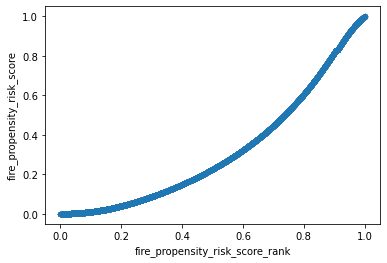

In [12]:
ax1 = out.plot.scatter(x='fire_propensity_risk_score_rank',y='fire_propensity_risk_score', alpha = 0.01)

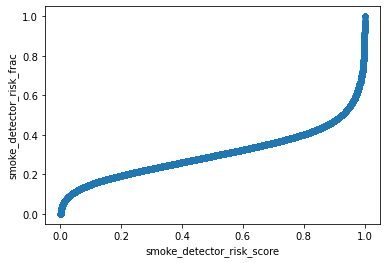

In [13]:
ax1 = out.plot.scatter(x='smoke_detector_risk_score',y='smoke_detector_risk_frac')

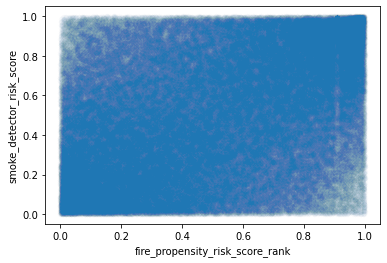

In [14]:
ax1 = out.plot.scatter(x='fire_propensity_risk_score_rank',y='smoke_detector_risk_score', alpha = .01)

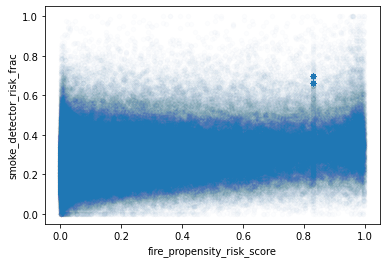

In [15]:
ax1 = out.plot.scatter(x='fire_propensity_risk_score',y='smoke_detector_risk_frac', alpha = 0.01)

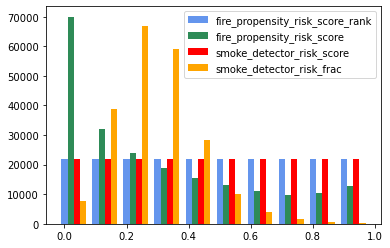

In [16]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(out['fire_propensity_risk_score_rank'])
b_heights, b_bins = np.histogram(out['fire_propensity_risk_score'], bins=a_bins)
c_heights, c_bins = np.histogram(out['smoke_detector_risk_score'], bins=a_bins)
d_heights, d_bins = np.histogram(out['smoke_detector_risk_frac'], bins=a_bins)

width = (a_bins[1] - a_bins[0])/5

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')
ax.bar(c_bins[:-1]+2*width, c_heights, width=width, facecolor='red')
ax.bar(d_bins[:-1]+3*width, d_heights, width=width, facecolor='orange')
ax.legend(['fire_propensity_risk_score_rank','fire_propensity_risk_score','smoke_detector_risk_score', 'smoke_detector_risk_frac' ])

In [17]:
out = out.round(3)
out

,GEOID,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,...,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4,years_fire_records,Prop_Max,Prop_Median,Sev_Max,Sev_Median,fire_propensity_risk_score_rank
0,010010201001,1.342,2.685,NaN,NaN,NaN,NaN,NaN,1.342,1.342,...,0.391,0.560,0.374,0.099,4,NaN,NaN,NaN,NaN,0.338
1,010010201002,1.581,0.791,NaN,1.581,0.791,NaN,1.581,0.791,NaN,...,0.391,0.560,0.374,0.099,6,1.581,1.581,0.791,0.791,0.257
2,010010202001,1.047,NaN,3.141,NaN,1.047,1.047,1.047,1.047,NaN,...,0.706,0.358,0.582,0.730,6,3.141,1.047,1.047,1.047,0.536
3,010010202002,2.833,2.833,2.833,0.944,0.944,NaN,0.944,NaN,3.777,...,0.706,0.358,0.582,0.730,7,2.833,0.944,0.944,0.944,0.449
4,010010203001,0.846,1.269,0.846,0.423,1.269,0.423,0.423,0.846,NaN,...,0.566,0.873,0.643,0.388,8,1.269,0.423,0.423,0.423,0.033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217734,560459511001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.373,NaN,...,0.392,0.637,0.233,0.856,1,NaN,NaN,NaN,NaN,0.801
217735,560459511002,0.632,NaN,NaN,NaN,NaN,NaN,0.632,NaN,NaN,...,0.392,0.637,0.233,0.856,2,0.632,0.632,NaN,NaN,0.428
217736,560459513001,0.869,NaN,0.869,NaN,0.869,0.869,NaN,NaN,1.738,...,0.509,0.604,0.286,0.695,5,0.869,0.869,NaN,NaN,0.290
217737,560459513002,NaN,NaN,0.971,NaN,NaN,0.971,NaN,NaN,NaN,...,0.509,0.604,0.286,0.695,2,0.971,0.971,NaN,NaN,0.622


In [18]:
# ENTER STATE 2 number code here as string then run the following cells 
#STATE_2_NUM_CODE = '13' #Georgia
STATE_2_NUM_CODE = '24' #Maryland
STATE_2_NUM_CODE = '47' #Tennessee

In [19]:
p = Path.cwd()

shp_p =  p / 'Data' / 'Master Project Data'/ 'Tiger_censusBlocks_2016' / f'tl_2016_{STATE_2_NUM_CODE}_bg.zip'

gdf = geo.read_file( 'zip://' + str(shp_p) ) 

#out['GEOID'] = out.index

gdf = gdf.merge(out,on = 'GEOID')

In [20]:
gdf

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4,years_fire_records,Prop_Max,Prop_Median,Sev_Max,Sev_Median,fire_propensity_risk_score_rank
0,47,093,005201,3,470930052013,Block Group 3,G5030,S,14162066,0,...,0.448,0.239,0.310,0.578,8,1.190,0.793,0.397,0.397,0.232
1,47,093,005809,2,470930058092,Block Group 2,G5030,S,3993629,0,...,0.070,0.266,0.338,0.076,4,1.586,0.397,0.397,0.397,0.009
2,47,093,003400,1,470930034001,Block Group 1,G5030,S,3803762,0,...,0.366,0.194,0.056,0.222,5,1.199,0.600,0.600,0.600,0.095
3,47,093,001400,3,470930014003,Block Group 3,G5030,S,317086,0,...,0.998,0.838,0.771,0.482,8,5.510,2.755,1.377,1.377,0.959
4,47,157,021746,2,471570217462,Block Group 2,G5030,S,863543,0,...,0.498,0.600,0.818,0.066,7,2.280,1.520,0.760,0.760,0.185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4120,47,081,950100,1,470819501001,Block Group 1,G5030,S,51867340,23701,...,0.496,0.647,0.147,0.157,3,0.780,0.390,0.390,0.390,0.136
4121,47,081,950400,2,470819504002,Block Group 2,G5030,S,175131081,11169,...,0.585,0.429,0.173,0.355,5,1.095,1.095,1.095,1.095,0.549
4122,47,081,950301,2,470819503012,Block Group 2,G5030,S,243823192,40833,...,0.800,0.869,0.081,0.949,3,0.648,0.648,0.648,0.648,0.250
4123,47,081,950200,1,470819502001,Block Group 1,G5030,S,109602032,20846,...,0.811,0.887,0.203,0.237,4,1.143,1.143,0.762,0.571,0.586


In [21]:
geoids_pop = ACS.tot_pop[ACS.tot_pop['tot_population']>=50]
gdf = gdf.merge(geoids_pop, how = 'inner', left_on = 'GEOID', right_index = True)
gdf

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,RPL_THEME2,RPL_THEME3,RPL_THEME4,years_fire_records,Prop_Max,Prop_Median,Sev_Max,Sev_Median,fire_propensity_risk_score_rank,tot_population
0,47,093,005201,3,470930052013,Block Group 3,G5030,S,14162066,0,...,0.239,0.310,0.578,8,1.190,0.793,0.397,0.397,0.232,2522.0
1,47,093,005809,2,470930058092,Block Group 2,G5030,S,3993629,0,...,0.266,0.338,0.076,4,1.586,0.397,0.397,0.397,0.009,2522.0
2,47,093,003400,1,470930034001,Block Group 1,G5030,S,3803762,0,...,0.194,0.056,0.222,5,1.199,0.600,0.600,0.600,0.095,1668.0
3,47,093,001400,3,470930014003,Block Group 3,G5030,S,317086,0,...,0.838,0.771,0.482,8,5.510,2.755,1.377,1.377,0.959,726.0
4,47,157,021746,2,471570217462,Block Group 2,G5030,S,863543,0,...,0.600,0.818,0.066,7,2.280,1.520,0.760,0.760,0.185,1316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4120,47,081,950100,1,470819501001,Block Group 1,G5030,S,51867340,23701,...,0.647,0.147,0.157,3,0.780,0.390,0.390,0.390,0.136,2565.0
4121,47,081,950400,2,470819504002,Block Group 2,G5030,S,175131081,11169,...,0.429,0.173,0.355,5,1.095,1.095,1.095,1.095,0.549,913.0
4122,47,081,950301,2,470819503012,Block Group 2,G5030,S,243823192,40833,...,0.869,0.081,0.949,3,0.648,0.648,0.648,0.648,0.250,1543.0
4123,47,081,950200,1,470819502001,Block Group 1,G5030,S,109602032,20846,...,0.887,0.203,0.237,4,1.143,1.143,0.762,0.571,0.586,2625.0


In [22]:
#all models with inputs
start_loc = gdf.loc[1,'INTPTLAT':'INTPTLON'].to_list()

m = folium.Map(location=start_loc, zoom_start=11 , tiles=None)

base_map = folium.FeatureGroup(name='Basemap', overlay=True, control=False)
folium.TileLayer(tiles='cartodbpositron').add_to(base_map)
base_map.add_to(m)

toolTip = {}
toolTip['CombinedRiskScore'] = ['GEOID', 'CombinedRiskScore','fire_propensity_risk_score','fire_severity_risk_score','smoke_detector_risk_score', 'tot_population']
toolTip['fire_propensity_risk_score'] = ['GEOID', 'fire_propensity_risk_score', 'Prop_Max', 'Prop_Median']+ACS_cols_to_use+['years_fire_records']
toolTip['fire_severity_risk_score'] = ['GEOID', 'fire_severity_risk_score', 'Sev_Max', 'Sev_Median']+ACS_cols_to_use+['years_fire_records']
toolTip['smoke_detector_risk_score'] = ['GEOID', 'smoke_detector_risk_score', 'RPL_THEME1','RPL_THEME2','RPL_THEME3','RPL_THEME4', 'geography','detectors_predicted', 'inc_pct_poverty' ]

layers = ['CombinedRiskScore', 'fire_propensity_risk_score', 'fire_severity_risk_score','smoke_detector_risk_score']
for l in layers:
    print(l)
    # plot chorpleth over the base map
    cp = folium.Choropleth(gdf,                                # geo data
                  data=gdf,                           # data
                  key_on='feature.properties.GEOID', # feature.properties.key
                  columns=['GEOID', l],   # [key, value]
                  fill_color='RdPu',                     # cmap
                  line_weight=0.1,                       # line wight (of the border)
                  line_opacity=0.5,                      # line opacity (of the border)
                  overlay = False,
                  legend_name = l.replace('_',' '),
                  name =  l.replace('_',' ')
                  ).add_to(m)    # name on the legend color bar
    folium.GeoJsonTooltip(toolTip[l]).add_to(cp.geojson)

# add layer controls
folium.LayerControl().add_to(m)
#layer1.add_to(m)

name = f"tenessee_all_models-{date.today()}.html"
m.save(name)

CombinedRiskScore
fire_propensity_risk_score
fire_severity_risk_score
smoke_detector_risk_score


In [24]:
#all models with inputs
start_loc = gdf.loc[1,'INTPTLAT':'INTPTLON'].to_list()

m = folium.Map(location=start_loc, zoom_start=11 , tiles=None)

base_map = folium.FeatureGroup(name='Basemap', overlay=True, control=False)
folium.TileLayer(tiles='cartodbpositron').add_to(base_map)
base_map.add_to(m)

toolTip = {}
toolTip['fire_propensity_risk_score'] = ['GEOID', 'fire_propensity_risk_score', 'fire_propensity_risk_score_rank', 'Prop_Max', 'Prop_Median']+ACS_cols_to_use+['years_fire_records']
toolTip['fire_propensity_risk_score_rank'] = ['GEOID', 'fire_propensity_risk_score','fire_propensity_risk_score_rank', 'Prop_Max', 'Prop_Median']+ACS_cols_to_use+['years_fire_records']
toolTip['smoke_detector_risk_score'] = ['GEOID', 'smoke_detector_risk_score', 'smoke_detector_risk_frac', 'RPL_THEME1','RPL_THEME2','RPL_THEME3','RPL_THEME4', 'geography','detectors_predicted', 'inc_pct_poverty' ]
toolTip['smoke_detector_risk_frac'] = ['GEOID', 'smoke_detector_risk_score', 'smoke_detector_risk_frac', 'RPL_THEME1','RPL_THEME2','RPL_THEME3','RPL_THEME4', 'geography','detectors_predicted', 'inc_pct_poverty' ]

layers = ['fire_propensity_risk_score','fire_propensity_risk_score_rank','smoke_detector_risk_score','smoke_detector_risk_frac']
for l in layers:
    print(l)
    # plot chorpleth over the base map
    cp = folium.Choropleth(gdf,                                # geo data
                  data=gdf,                           # data
                  key_on='feature.properties.GEOID', # feature.properties.key
                  columns=['GEOID', l],   # [key, value]
                  fill_color='RdPu',                     # cmap
                  line_weight=0.1,                       # line wight (of the border)
                  line_opacity=0.5,                      # line opacity (of the border)
                  overlay = False,
                  legend_name = l.replace('_',' '),
                  name =  l.replace('_',' ')
                  ).add_to(m)    # name on the legend color bar
    folium.GeoJsonTooltip(toolTip[l]).add_to(cp.geojson)

# add layer controls
folium.LayerControl().add_to(m)
#layer1.add_to(m)

name = f"maryland_original_rank_models-{date.today()}.html"
m.save(name)

fire_propensity_risk_score
fire_propensity_risk_score_rank
smoke_detector_risk_score
smoke_detector_risk_frac


In [88]:
#overview map- each model
start_loc = gdf.loc[1,'INTPTLAT':'INTPTLON'].to_list()

m = folium.Map(location=start_loc, zoom_start=11 , tiles=None)

base_map = folium.FeatureGroup(name='Basemap', overlay=True, control=False)
folium.TileLayer(tiles='cartodbpositron').add_to(base_map)
base_map.add_to(m)

toolTip = ['GEOID', 'CombinedRiskScore','fire_propensity_risk_score','fire_severity_risk_score','smoke_detector_risk_score']

layers = ['CombinedRiskScore','fire_propensity_risk_score', 'fire_severity_risk_score', 'smoke_detector_risk_score' ]
for l in layers:
    # plot chorpleth over the base map
    cp = folium.Choropleth(gdf,                                # geo data
                  data=gdf,                           # data
                  key_on='feature.properties.GEOID', # feature.properties.key
                  columns=['GEOID', l],   # [key, value]
                  fill_color='RdPu',                     # cmap
                  line_weight=0.1,                       # line wight (of the border)
                  line_opacity=0.5,                      # line opacity (of the border)
                  overlay = False,
                  legend_name = l.replace('_',' '),
                  name =  l.replace('_',' ')
                  ).add_to(m)    # name on the legend color bar
    folium.GeoJsonTooltip(toolTip).add_to(cp.geojson)

# add layer controls
folium.LayerControl().add_to(m)
#layer1.add_to(m)


m.save('georgia_overview.html')

KeyboardInterrupt: 

In [ ]:
#smoke alarm and svi
start_loc = gdf.loc[1,'INTPTLAT':'INTPTLON'].to_list()

m = folium.Map(location=start_loc, zoom_start=11 , tiles=None)

base_map = folium.FeatureGroup(name='Basemap', overlay=True, control=False)
folium.TileLayer(tiles='cartodbpositron').add_to(base_map)
base_map.add_to(m)

# plot chorpleth over the base map
themes = ['RPL_THEME1','RPL_THEME2','RPL_THEME3','RPL_THEME4']
cp = folium.Choropleth(gdf,                                # geo data
                  data=gdf,                           # data
                  key_on='feature.properties.GEOID', # feature.properties.key
                  columns=['GEOID', 'smoke_detector_risk_score'],   # [key, value]
                  fill_color='RdPu',                     # cmap
                  line_weight=0.1,                       # line wight (of the border)
                  line_opacity=0.5,                      # line opacity (of the border)
                  overlay = False,
                  legend_name = 'smoke_detector_risk_score',
                  name = 'smoke_detector_risk_score'
                  ).add_to(m)    # name on the legend color bar
 
folium.GeoJsonTooltip(['GEOID', 'smoke_detector_risk_score', 'geography','detectors_predicted']+themes).add_to(cp.geojson)

for t in themes:
    cp = folium.Choropleth(gdf,                                # geo data
                  data=gdf,                           # data
                  key_on='feature.properties.GEOID', # feature.properties.key
                  columns=['GEOID', t],   # [key, value]
                  fill_color='RdPu',                     # cmap
                  line_weight=0.1,                       # line wight (of the border)
                  line_opacity=0.5,                      # line opacity (of the border)
                  overlay = False,
                  legend_name = t,
                  name = t
                  ).add_to(m)    # name on the legend color bar
 
    folium.GeoJsonTooltip(['GEOID']+['smoke_detector_risk_score']+themes).add_to(cp.geojson)
# add layer controls
folium.LayerControl().add_to(m)


m.save('georgia_smoke_svi.html')

In [ ]:
#inputs for propensity and severity models
start_loc = gdf.loc[1,'INTPTLAT':'INTPTLON'].to_list()

m = folium.Map(location=start_loc, zoom_start=11 , tiles=None)

base_map = folium.FeatureGroup(name='Basemap', overlay=True, control=False)
folium.TileLayer(tiles='cartodbpositron').add_to(base_map)
base_map.add_to(m)

toolTip = {}
toolTip['fire_propensity_risk_score'] = ['GEOID', 'fire_propensity_risk_score']+ACS_cols_to_use+['years_fire_records']
toolTip['fire_severity_risk_score'] = ['GEOID', 'fire_severity_risk_score']+ACS_cols_to_use+['years_fire_records']

layers = ['fire_propensity_risk_score', 'fire_severity_risk_score']
for l in layers:
    # plot chorpleth over the base map
    cp = folium.Choropleth(gdf,                                # geo data
                  data=gdf,                           # data
                  key_on='feature.properties.GEOID', # feature.properties.key
                  columns=['GEOID', l],   # [key, value]
                  fill_color='RdPu',                     # cmap
                  line_weight=0.1,                       # line wight (of the border)
                  line_opacity=0.5,                      # line opacity (of the border)
                  overlay = False,
                  legend_name = l.replace('_',' '),
                  name =  l.replace('_',' ')
                  ).add_to(m)    # name on the legend color bar
    folium.GeoJsonTooltip(toolTip[l]).add_to(cp.geojson)

# add layer controls
folium.LayerControl().add_to(m)
#layer1.add_to(m)


m.save('georgia_fire_models.html')

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
geoid1 = out[out['GEOID'].str[:-1]=='13089023603']
geoid1

In [ ]:
geoid2 = out[out['GEOID']=='130890235043']
geoid2

In [ ]:
for i in range(134):
    print(gdf.columns[i])

In [ ]:
breakdown_smokealarm = pd.read_csv(r'.\Data\Model Outputs\SmokeAlarmPredictiveModel_USA_SVI_pov.csv')
breakdown_smokealarm['GEOID'] = breakdown_smokealarm['geoid'].str[2:]
breakdown_smokealarm

In [ ]:
gdf = gdf.merge(breakdown_smokealarm,on = 'GEOID')
gdf

In [ ]:
gdf['rd_SVI_pov'] = np.clip(gdf['rd_SVI_pov'],0,100)  
gdf['rd_SVI_pov'] = 100-gdf['rd_SVI_pov']
gdf['Just_SVI_pov'] = np.clip(gdf['Just_SVI_pov'],0,100)  
gdf['Just_SVI_pov'] = 100-gdf['Just_SVI_pov']

In [ ]:
gdf

In [ ]:
#smoke alarm and svi
start_loc = gdf.loc[1,'INTPTLAT':'INTPTLON'].to_list()

m = folium.Map(location=start_loc, zoom_start=11 , tiles=None)

base_map = folium.FeatureGroup(name='Basemap', overlay=True, control=False)
folium.TileLayer(tiles='cartodbpositron').add_to(base_map)
base_map.add_to(m)

# plot chorpleth over the base map
themes = ['RPL_THEME1','RPL_THEME2','RPL_THEME3','RPL_THEME4']
layers = ['rd_SVI_pov', 'Just_SVI_pov']
cp = folium.Choropleth(gdf,                                # geo data
                  data=gdf,                           # data
                  key_on='feature.properties.GEOID', # feature.properties.key
                  columns=['GEOID', 'smoke_detector_risk_score'],   # [key, value]
                  fill_color='RdPu',                     # cmap
                  line_weight=0.1,                       # line wight (of the border)
                  line_opacity=0.5,                      # line opacity (of the border)
                  overlay = False,
                  legend_name = 'smoke_detector_risk_score',
                  name = 'smoke_detector_risk_score'
                  ).add_to(m)    # name on the legend color bar
 
folium.GeoJsonTooltip(['GEOID', 'smoke_detector_risk_score', 'geography_x','detectors_predicted']+layers+themes).add_to(cp.geojson)

for t in layers:
    cp = folium.Choropleth(gdf,                                # geo data
                  data=gdf,                           # data
                  key_on='feature.properties.GEOID', # feature.properties.key
                  columns=['GEOID', t],   # [key, value]
                  fill_color='RdPu',                     # cmap
                  line_weight=0.1,                       # line wight (of the border)
                  line_opacity=0.5,                      # line opacity (of the border)
                  overlay = False,
                  legend_name = t,
                  name = t
                  ).add_to(m)    # name on the legend color bar
 
    folium.GeoJsonTooltip(['GEOID','smoke_detector_risk_score', 'geography_x','detectors_predicted']+layers+themes).add_to(cp.geojson)
# add layer controls
folium.LayerControl().add_to(m)


m.save('maryland_smoke_svi_test.html')